# C2-Overview of Supervised Learning

## Variable Types and Terminology

In this section, the authors introduce a number of variables that are frequently used in machine learning fields. The definition is very clear and is very important for beginers. 

## Two Simple Approaches to Prediction

### Least Squares
Formula: 

$$
\hat{Y}=\hat{\beta}_{0}+\sum_{j=1}^{p}X_{j}\hat{\beta}_{j}=X^T{\beta}. 
$$

`Fun fact`: $(X,\hat{Y})$ represents a hyperplane, which means if $(X,Y)$ is not close to a hyperplane, then the prediction will be very inaccurate.

`Assumption`: the relationship between the input and output is linear. In another word, the function $f$ of $y=f(x)$ is a hyperplane.

`Pros`: The number of learnable parameters is small, which is equal to the 1 + number of features. So the required number of data points to train the model is small. And easy to explain the prediction.

`Cons`: The relationship between the input and output maybe non-linear.

`When to use`: We you have a good prior that the relationship between the input and output is linear.

`How to compute the parameter` $\beta$: 
1. We can build a loss function with least squares, i.e., $$RSS(\beta)=\sum_{i=1}^N(y_i-x_i^T\beta)^2=(y-\textbf{X}\beta)^T(y-\textbf{Y}\beta),$$ where $\textbf{X}$ is a $N\times p$ matrix with each row as an input vector and $\textbf{y}$ is a $N$-vector.

2. We try to find a good $\beta$ to minimize the loss function $RSS(\beta)$. Since this is a quadratic function, we know the minimum value can be get when the derivative of this function w.r.t $\beta$ is zero, i.e., ${\bf X}^{T}({\bf y}-{\bf X}\beta)=0. $
if $X^TX$ is nonsingular, then we have the close-form solution $$\beta=({\bf X}^{T}{\bf X})^{-1}{\bf X}^{T}{\bf y}, $$


The book provides two scenarios. 

`Scenario 1`: The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means. 

`My understanding is`: each data has two features and there are at least two classes in dataset. The two features are generated from a bivariate Gaussian distribution. These two features are uncorrelated thus the componets of these bivariate distributions are uncorrelated. The means of these bivariate distributions for each class are different. Following is the formula of bivariate normal distribution and the code write by chatgpt from above description. You can see the bivariate normal distribution describes the joint distribution of two random variables.

$$
p(X=x,Y=y)={\frac{1}{2\pi\sigma_{x}\sigma_{y}{\sqrt{1-\rho^{2}}}}}\exp\left[-{\frac{1}{2(1-\rho^{2})}}\left({\frac{(x-\mu_{x})^{2}}{\sigma_{x}^{2}}}+{\frac{(y-\mu_{y})^{2}}{\sigma_{y}^{2}}}-{\frac{2\rho(x-\mu_{x})(y-\mu_{y})}{\sigma_{x}\sigma_{y}}}\right)\right] $$

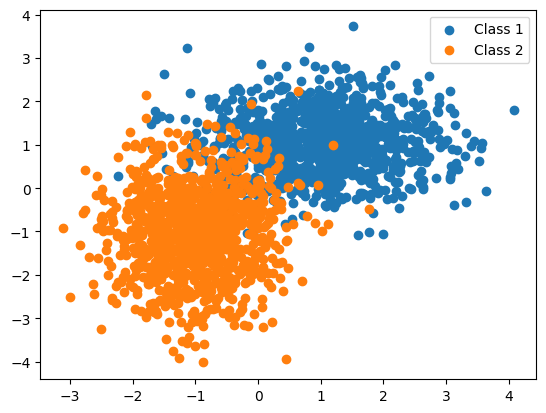

In [1]:


import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Define the number of data points to generate
num_samples = 1000

# Define the means for each Gaussian distribution
mean1 = [1, 1]
mean2 = [-1, -1]

# Define the covariance matrix for each Gaussian distribution
cov1 = np.array([[1, 0], [0, 0.5]])
cov2 = np.array([[0.5, 0], [0, 1]])

# Generate the data points from the bivariate Gaussian distributions
# data1 for class1 and data2 for class2
# the joint distribution requires the mean in d-dimensional space where d is the number of features, and the covariance matrix which is a d x d matrix
data1 = np.random.multivariate_normal(mean1, cov1, num_samples)
data2 = np.random.multivariate_normal(mean2, cov2, num_samples)

# Plot the generated data points
plt.scatter(data1[:, 0], data1[:, 1], label='Class 1')
plt.scatter(data2[:, 0], data2[:, 1], label='Class 2')
plt.legend()
plt.show()


`Scenario2`: The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.

`My understanding is`: Firstly and most importantly, I just realized that the mixture model means the data is generated from one randomly-choosed components from the mixture model. However, this sentence did not imply the that each class is generated from the same mixture model or different one. Also, the number of feature is ambiguous in this sentence. If the feature number is two, then each distribution in the mixture model is bivariate Gaussian distribution. Finnaly, for these 10 Gaussian distributions, their means are sampled from a Gaussian distribution.

$$
\hat{Y}=\hat{\beta}_{0}+\sum_{j=1}^{p}X_{j}\hat{\beta}_{j}=X^T{\beta}. 
$$

In section 2.3.3, it provides the details of generating data in sceario2. Again, the following code is written by chatgpt.

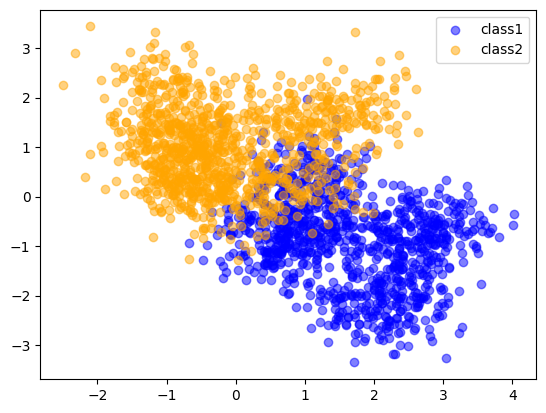

In [4]:
import numpy as np

# Generate means for BLUE class
np.random.seed(1)
blue_means = np.random.multivariate_normal(mean=[1, 0], cov=np.eye(2), size=10)

# Generate means for ORANGE class
orange_means = np.random.multivariate_normal(mean=[0, 1], cov=np.eye(2), size=10)

# Generate BLUE class data
blue_data = np.empty((0, 2))
for _ in range(1000):
    mean = blue_means[np.random.randint(0, 10)]
    sample = np.random.multivariate_normal(mean=mean, cov=np.eye(2)/5)
    blue_data = np.vstack([blue_data, sample])

# Generate ORANGE class data
orange_data = np.empty((0, 2))
for _ in range(1000):
    mean = orange_means[np.random.randint(0, 10)]
    sample = np.random.multivariate_normal(mean=mean, cov=np.eye(2)/5)
    orange_data = np.vstack([orange_data, sample])

# Plot the data
import matplotlib.pyplot as plt

plt.scatter(blue_data[:,0], blue_data[:,1], color='blue', alpha=0.5, label='class1')
plt.scatter(orange_data[:,0], orange_data[:,1], color='orange', alpha=0.5, label='class2')
plt.legend()
plt.show()



### K Nearest Neighbors
`Assumption`: Not mentioned in the book, but in fact it assume the same-class data are distributed closely in Euclidean space which might not be true, e.g., a grayscale cat is far way from colored cat in Euclidean space but they are from the same class.

`Pros`: Potential low bias.

`Cons`: Potential high variance.

`When to use`: small dataset and low-dimensional dataset.

`Fun fact`: KNN can condiered as assigning 0-1 weights to each data accroding to the distance. Kernel methods can be considered as soft method with smoothly assign weights according to the distance.

`Fun conclusion`: The book says: linear models fit to a basis expansion of the original inputs allow arbitrarily complex models. According to chatgpt, the meaning of basis expansion is that we can use polynomial basis to expand the original input. For example, if the original input is $x$, then we can use $x^2$ as the new input. Then we can use linear model to fit the new input. More generally, we have $$y = w_0 + w_1 f_1(x) + w_2 f_2(x) + \cdots + w_n f_n(x),$$ where $f_i(x)$ is the $i$-th basis function which could be a non-linear function, e.g., $f_2(x)=x^2$ and $f_3(x)=x^3$.

`fun conclusion2`: Projection pursuit and neural network models consist of sums of non-linearly transformed linear models. The projection pursuit is $$y = \sum_{j=1}^J g_j(\mathbf{w}_j^T \mathbf{x}),$$ where $g_j$ is a non-linear function and $\mathbf{w}_j$ is a weight vector. In another word, projection pursuit model can be considered as nonlinearly transform a bunch of linear models and sum the results. The neural network model is similar, $$y = \sum_{j=1}^J w_j^{(2)} g\left(\sum_{i=1}^I w_{ij}^{(1)} x_i + w_{j0}^{(1)}\right) + w_0^{(2)},$$ where $y$ is the output, $x_i$ is the $i$-th input feature, $w_{ij}^{(1)}$ is the weight for the connection between the $i$-th input feature and the $j$-th hidden unit, $w_{j0}^{(1)}$ is the bias term for the $j$-th hidden unit, $w_j^{(2)}$ is the weight for the connection between the $j$-th hidden unit and the output, $g$ is a non-linear activation function applied to the sum of inputs to the $j$-th hidden unit.


## Statistical Decision Theory

The statistical decision theory is trying to choose a decision rule that minimizes a loss function. In another word, after we have a loss function, the theory researchs how to minimize it. 

Firstly, the book introduces the expected prediction error (EPE). The first loss function is the mean square loss. After some derivation, we know the way to minimize this loss function is set the model as $f(x)=E(Y|X)$.

\begin{align}
EPE(f)&=E(Y-f(x)^2)  \\
&=\int[y-f(x)]^2 P(dx,dy) \\
&=E_XE_{Y|X}([Y-f(X)]^2|X) \\
\Rightarrow  f(x) & = \arg\min_c E_{Y|X}([Y-c]^2|X) \\
\Rightarrow  f(x) & = E(Y|X) \\
\end{align}

However, we can also use $L_1$ loss function, in this case

\begin{align}
EPE(f)&=E(|Y-f(x)|)  \\
\Rightarrow  f(x) & = \mathrm{median}(Y|X) \\
\end{align}

This is counterintuitive yet right, i.e., when you use $L_1$ loss function, the optimal prediction is the median of the conditional distribution of $Y$ given $X$. The reason is that the median is the value that minimizes the sum of absolute deviations from the median.

The following code is an exmaple of the comparison.

In [1]:
import numpy as np
a = np.array([1,2,3,4,5,10,12])
mean = a.mean()
median = np.median(a)
mean, median
(a - median).__abs__().sum(), (a - mean).__abs__().sum()

(21.0, 22.857142857142858)

For categorical prediction, we usually exploit 0-1 loss function. Omit all of the derivation, we know the optimal prediction is predict the data as the class with the highest conditional probability.
$$
{\hat{G}}(x)={\arg\min}_{g\in{\mathcal{G}}}[1-{\mathrm{Pr}}(g|X=x)]=\max_g P(g|X=x)
$$

```{note}
The classifier always assign the label with the highest conditional probability is called the *Bayes classifier*. The error rate of Bayes classifier is the *Bayes rate*.
```


As for KNN, we can think it relax the highest conditional probability to the marjotity vote in the neighborhood. In another word, the conditional probability is estimated by the proportion of the labels in the neighborhood. 